<h2>Section 1: Data Preparation and Setup</h2>

My career is in the power generation and distribution industry. I used the Combined Cycle Power Plant (CCPP) dataset for the previous assignments. In order to perform clustering analyses, I chose a dataset with some discrete variables, rather than all continuous variables like the CCPP dataset. 

The UCI HAR IMU dataset is used to complement the Combined Cycle Power Plant (CCPP) analyses performed during the previous assignments. The application of advanced control algorithms to devices, such as variable frequency drives (VFDs), valves, and regulators, make this dataset relevant to the power generation and distribution industry. The features used for the supervised task are acceleration in the x,y,z directions, obtained from an IMU on a smartphone, and the labels are different activities performed while wearing said smartphone. 

Valves might have automated components, and maybe the analysis of maintenance profiles could benefit from the ability to cluster valves based on several different parameters: location, volumetric flow rate, temperature of the water, etc. 

<blockquote>Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.<br><br>
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.<br><br>
The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.</blockquote>

In [315]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [2]:
os.listdir()

['.DS_Store',
 'human+activity+recognition+using+smartphones',
 'UCI_HAR_IMU.ipynb',
 '.ipynb_checkpoints',
 'human+activity+recognition+using+smartphones.zip']

In [3]:
os.chdir('human+activity+recognition+using+smartphones')

In [4]:
os.listdir()

['.DS_Store',
 'UCI HAR Dataset',
 'UCI HAR Dataset.zip',
 'UCI HAR Dataset.names']

In [5]:
os.chdir('UCI HAR Dataset')

In [6]:
os.listdir()

['.DS_Store',
 'test',
 'features.txt',
 'activity_labels.txt',
 'features_info.txt',
 'train',
 'README.txt']

In [229]:
try:
    with open('activity_labels.txt', 'r', encoding='latin-1') as f:
        for line in f:
            print(line, end='')
except UnicodeDecodeError:
    print("Failed to decode with latin-1. The file may be a different encoding.")
except FileNotFoundError:
    print("File not found. Please check the path to 'UCI HAR Dataset.names'.")


1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING


In [230]:
activity_names_df = pd.read_csv('activity_labels.txt', sep='\\s+', header=None, names=['activity_id', 'activity_name'])

print(activity_names_df)

   activity_id       activity_name
0            1             WALKING
1            2    WALKING_UPSTAIRS
2            3  WALKING_DOWNSTAIRS
3            4             SITTING
4            5            STANDING
5            6              LAYING


In [231]:
df = pd.read_csv('train/X_train.txt', header=None)
df.head(10)

0
0    2.8858451e-001 -2.0294171e-002 -1.3290514e-0...
1    2.7841883e-001 -1.6410568e-002 -1.2352019e-0...
2    2.7965306e-001 -1.9467156e-002 -1.1346169e-0...
3    2.7917394e-001 -2.6200646e-002 -1.2328257e-0...
4    2.7662877e-001 -1.6569655e-002 -1.1536185e-0...
5    2.7719877e-001 -1.0097850e-002 -1.0513725e-0...
6    2.7945388e-001 -1.9640776e-002 -1.1002215e-0...
7    2.7743247e-001 -3.0488303e-002 -1.2536043e-0...
8    2.7729342e-001 -2.1750698e-002 -1.2075082e-0...
9    2.8058569e-001 -9.9602983e-003 -1.0606516e-0...

In [232]:
feature_names_df = pd.read_csv('features.txt', sep='\\s+', header=None, names=['id', 'feature_name'])

raw_feature_names = feature_names_df['feature_name'].tolist()

unique_feature_names = []

counts = {}

for name in raw_feature_names:
    if name in counts:
        counts[name] += 1
        
        unique_feature_names.append(f"{name}_{counts[name]}")
        
    else:
        counts[name] = 1
        
        unique_feature_names.append(name)

X_train_df = pd.read_csv('train/X_train.txt', sep='\\s+', header=None, names=unique_feature_names)

print(f"Loaded DataFrame shape: {X_train_df.shape}")

print(X_train_df.head())

Loaded DataFrame shape: (7352, 561)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z 

In [233]:
X_train_3imu_df = X_train_df[['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']]

X_train_3imu_df.columns = ['acc_x','acc_y','acc_z']

X_train_3imu_df

acc_x     acc_y     acc_z
0     0.288585 -0.020294 -0.132905
1     0.278419 -0.016411 -0.123520
2     0.279653 -0.019467 -0.113462
3     0.279174 -0.026201 -0.123283
4     0.276629 -0.016570 -0.115362
...        ...       ...       ...
7347  0.299665 -0.057193 -0.181233
7348  0.273853 -0.007749 -0.147468
7349  0.273387 -0.017011 -0.045022
7350  0.289654 -0.018843 -0.158281
7351  0.351503 -0.012423 -0.203867

[7352 rows x 3 columns]

In [234]:
X_train_3imu_df = X_train_3imu_df.fillna(0)

In [235]:
X_train_3imu_df['acc_x']

0       0.288585
1       0.278419
2       0.279653
3       0.279174
4       0.276629
          ...   
7347    0.299665
7348    0.273853
7349    0.273387
7350    0.289654
7351    0.351503
Name: acc_x, Length: 7352, dtype: float64

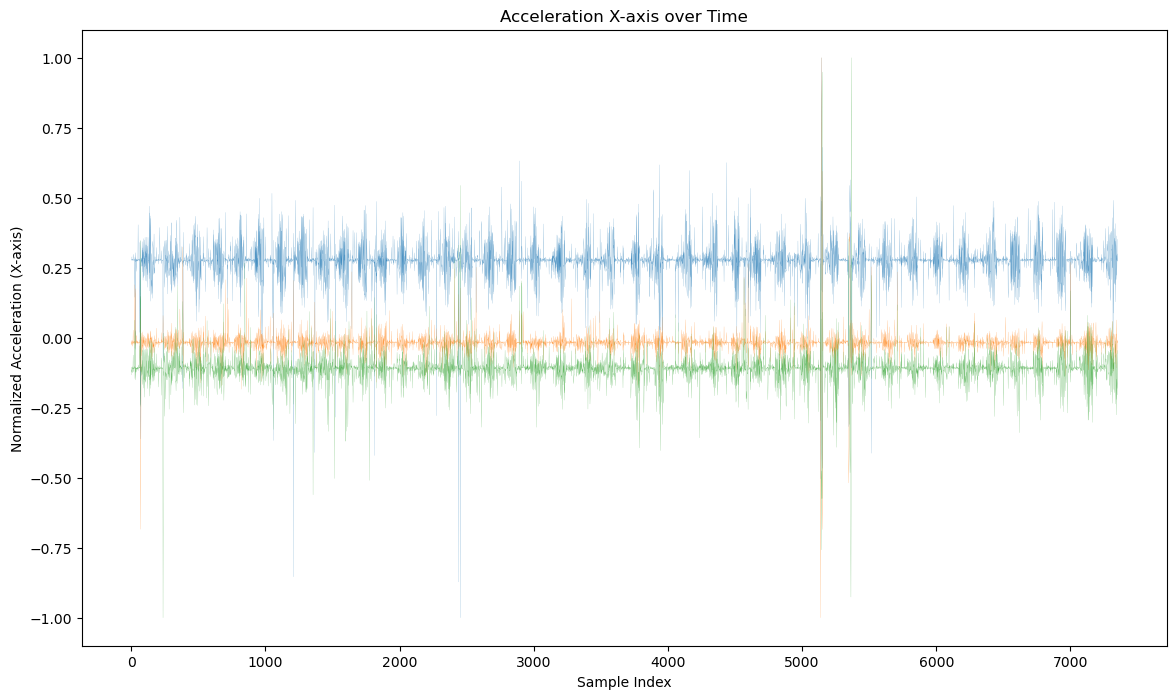

In [237]:
fig = plt.figure(figsize=(14,8))

plt.plot(X_train_3imu_df.index, X_train_3imu_df['acc_x'].values, linewidth=0.1)

plt.plot(X_train_3imu_df.index, X_train_3imu_df['acc_y'].values, linewidth=0.1)

plt.plot(X_train_3imu_df.index, X_train_3imu_df['acc_z'].values, linewidth=0.1)

plt.xlabel("Sample Index")

plt.ylabel("Normalized Acceleration (X-axis)")

plt.title("Acceleration X-axis over Time")

plt.show()

In [16]:
os.listdir('train/Inertial Signals')

['body_gyro_z_train.txt',
 'body_acc_y_train.txt',
 'total_acc_z_train.txt',
 'body_acc_x_train.txt',
 'body_gyro_x_train.txt',
 'total_acc_y_train.txt',
 'body_gyro_y_train.txt',
 'total_acc_x_train.txt',
 'body_acc_z_train.txt']

In [251]:
df = pd.read_csv('train/Inertial Signals/total_acc_z_train.txt', header=None)

In [241]:
def load_imu_data(feature_name):
    acc_path = f"train/Inertial Signals/total_acc_{feature_name}_train.txt"
    
    acc_df = pd.read_csv(acc_path, sep='\\s+', header=None)
    
    labels_path = "train/y_train.txt"
    
    y_train_df = pd.read_csv(labels_path, sep='\\s+', header=None, names=['activity_id'])
    
    labeled_acc_df = pd.concat([y_train_df, acc_df], axis=1)
    
    activity_labels_path = "activity_labels.txt"
    
    activity_names_df = pd.read_csv(activity_labels_path, sep='\\s+', header=None, names=['activity_id', 'activity_name'])
    
    final_df = pd.merge(labeled_acc_df, activity_names_df, on='activity_id', how='left')
    
    cols = list(final_df.columns)

    cols.insert(1, cols.pop(cols.index('activity_name')))
    
    final_df = final_df[cols]
    
    del final_df['activity_id']
        
    return final_df

In [250]:
labeled_acc_x_df = load_imu_data('x')

labeled_acc_y_df = load_imu_data('y')

labeled_acc_z_df = load_imu_data('z')

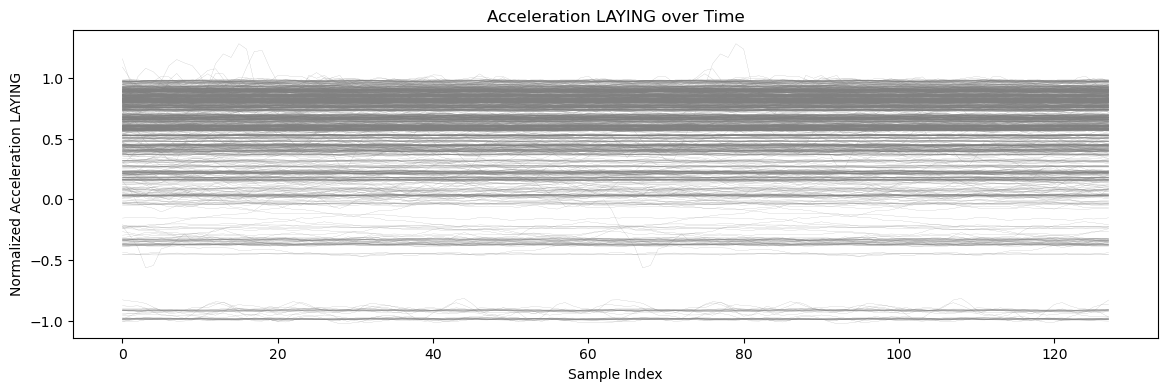

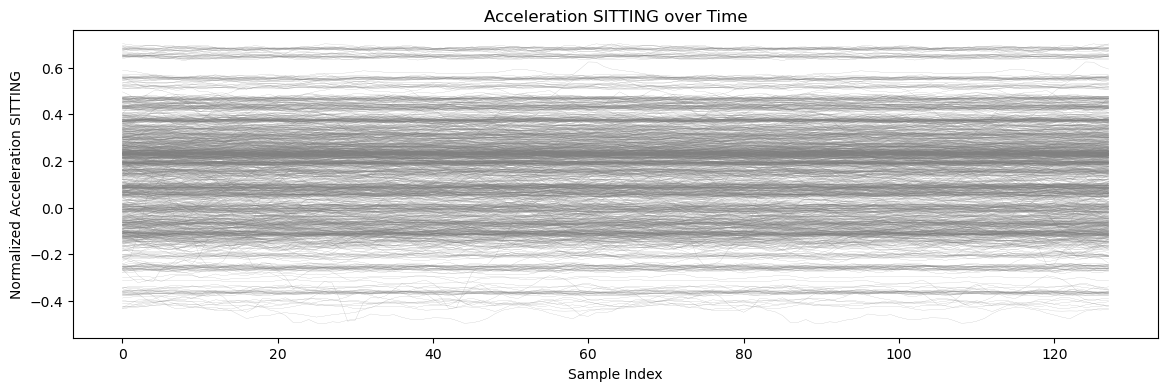

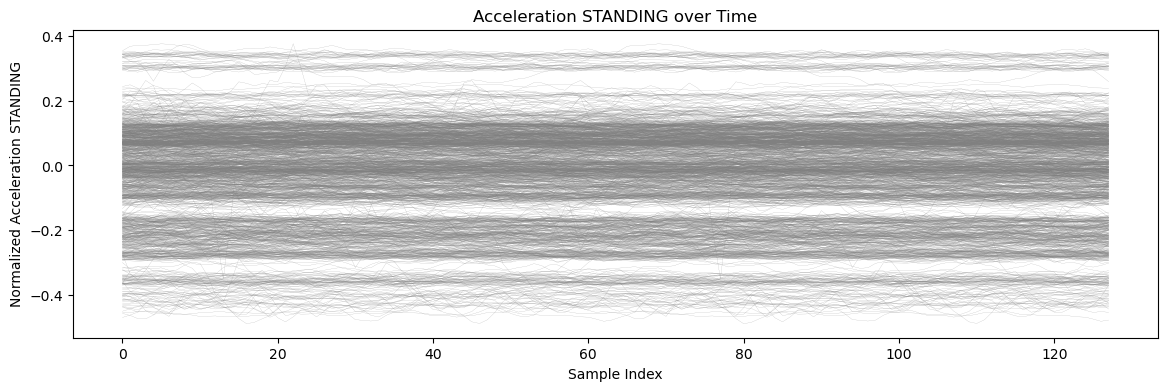

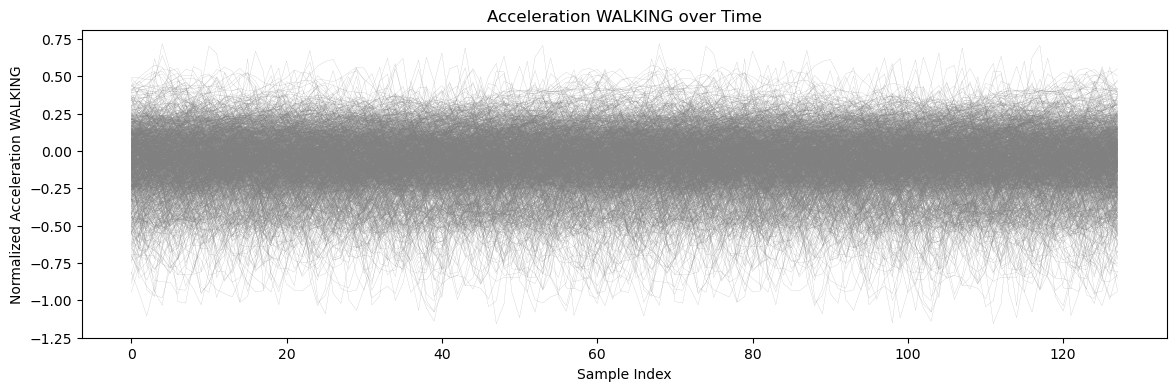

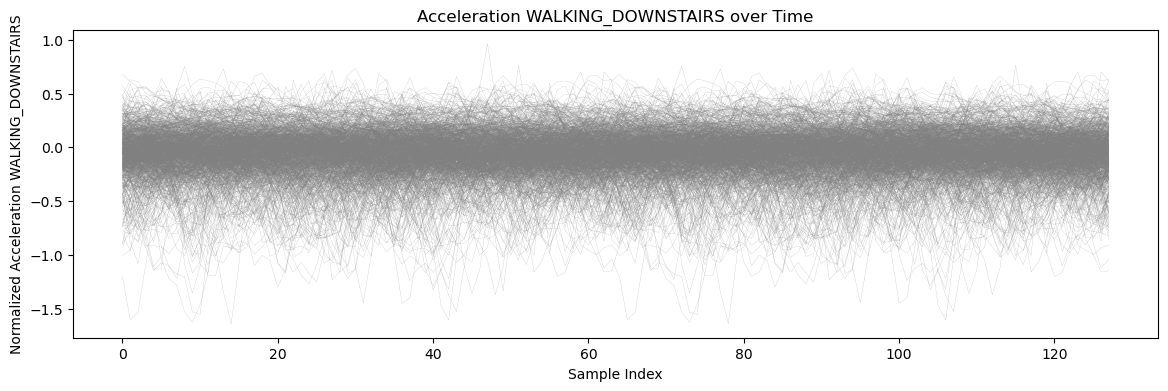

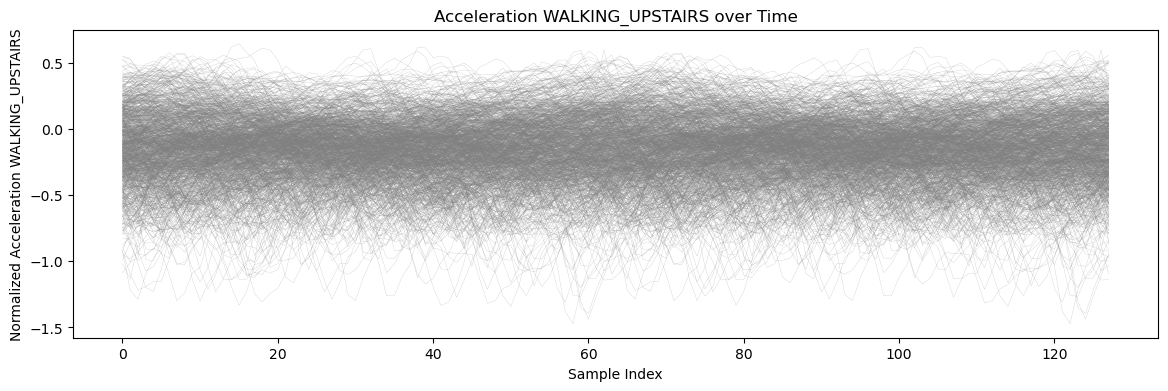

In [243]:
for activity_name, activity_df in labeled_acc_z_df.groupby('activity_name'):
    fig = plt.figure(figsize=(14,4))

    for i, row in activity_df.iterrows():    
        plt.plot(row.iloc[1:], color='gray', linewidth=0.1)
    
        plt.xlabel(f"Sample Index")
        
        plt.ylabel(f"Normalized Acceleration {activity_name}")
        
        plt.title(f"Acceleration {activity_name} over Time")
    
    plt.show()

Is it appropriate to include figures and drawings that provide ampifying details as to whether or not clustering is possible?

In [246]:
feature_averages = {}

for activity_name in activity_names_df['activity_name']:
    feature_averages[activity_name] = {}

for activity_name, activity_df in labeled_acc_x_df.groupby('activity_name'):
    feature_averages[activity_name]['x'] = activity_df.iloc[:,1:].mean(axis=1).mean()

for activity_name, activity_df in labeled_acc_y_df.groupby('activity_name'):
    feature_averages[activity_name]['y'] = activity_df.iloc[:,1:].mean(axis=1).mean()

for activity_name, activity_df in labeled_acc_z_df.groupby('activity_name'):
    feature_averages[activity_name]['z'] = activity_df.iloc[:,1:].mean(axis=1).mean()

In [360]:
df = {}

for activity_name in activity_names_df['activity_name']:
    df[activity_name] = {}

for activity_name, activity_df in labeled_acc_x_df.groupby('activity_name'):
    df[activity_name]['x_d'] = activity_df.iloc[:,1:].diff(1, axis=1).fillna(0).mean(axis=1).mean()

for activity_name, activity_df in labeled_acc_y_df.groupby('activity_name'):
    df[activity_name]['y_d'] = activity_df.iloc[:,1:].diff(1, axis=1).fillna(0).mean(axis=1).mean()

for activity_name, activity_df in labeled_acc_z_df.groupby('activity_name'):
    df[activity_name]['z_d'] = activity_df.iloc[:,1:].diff(1, axis=1).fillna(0).mean(axis=1).mean()

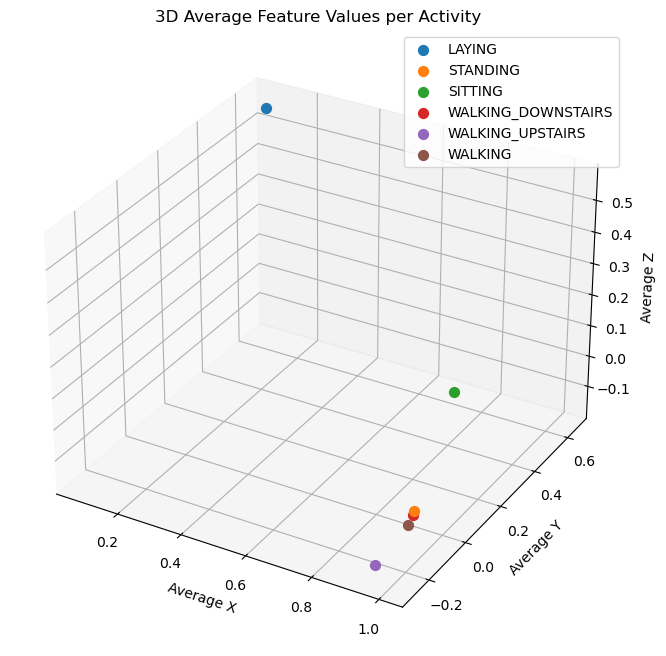

In [363]:
fig = plt.figure(figsize=(10, 8))

_3dplot = fig.add_subplot(111, projection='3d')

for activity_name, value in reversed(feature_averages.items()):
    _3dplot.scatter([value['x']], [value['y']], [value['z']], label=activity_name, s=50)

_3dplot.set_xlabel('Average X')

_3dplot.set_ylabel('Average Y')

_3dplot.set_zlabel('Average Z')

plt.title("3D Average Feature Values per Activity")

plt.legend()

plt.show()

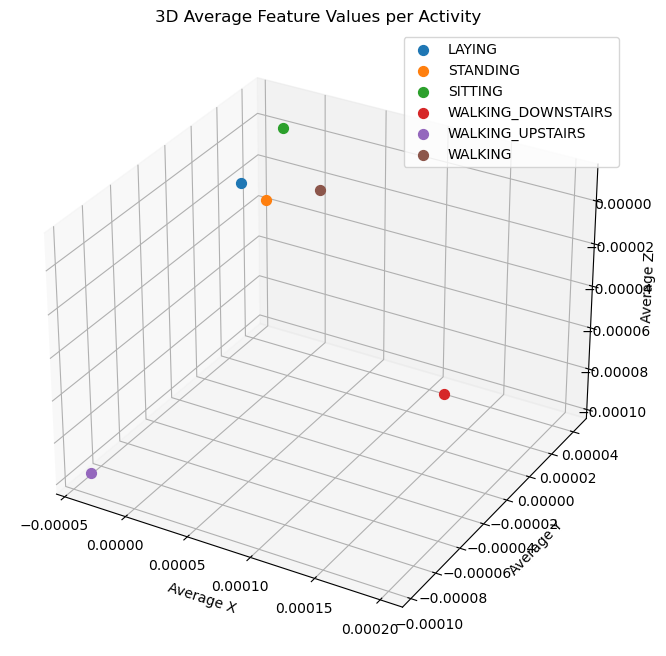

In [364]:
fig = plt.figure(figsize=(10, 8))

_3dplot = fig.add_subplot(111, projection='3d')

for activity_name, value in reversed(df.items()):
    _3dplot.scatter([value['x_d']], [value['y_d']], [value['z_d']], label=activity_name, s=50)

_3dplot.set_xlabel('Average X')

_3dplot.set_ylabel('Average Y')

_3dplot.set_zlabel('Average Z')

plt.title("3D Average Feature Values per Activity")

plt.legend()

plt.show()

An initial look at the dataset shows that clustering should be possible.

In [247]:
feature_averages_by_row = {}

for activity_name in activity_names_df['activity_name']:
    feature_averages_by_row[activity_name] = {}

for activity_name, activity_df in labeled_acc_x_df.groupby('activity_name'):
    feature_averages_by_row[activity_name]['x'] = activity_df.iloc[:,1:].mean(axis=1)

for activity_name, activity_df in labeled_acc_y_df.groupby('activity_name'):
    feature_averages_by_row[activity_name]['y'] = activity_df.iloc[:,1:].mean(axis=1)

for activity_name, activity_df in labeled_acc_z_df.groupby('activity_name'):
    feature_averages_by_row[activity_name]['z'] = activity_df.iloc[:,1:].mean(axis=1)


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


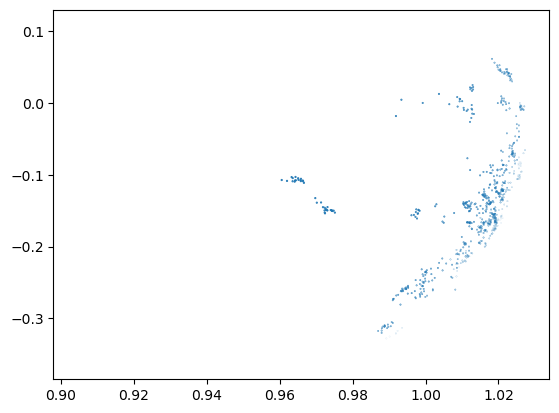

In [248]:
fig = plt.figure()

plt.scatter(feature_averages_by_row['STANDING']['x'],feature_averages_by_row['STANDING']['y'],feature_averages_by_row['STANDING']['z'])

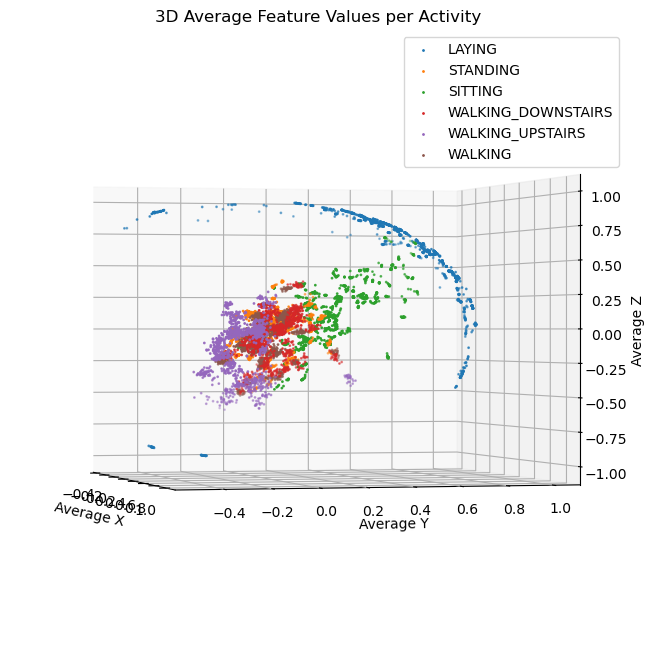

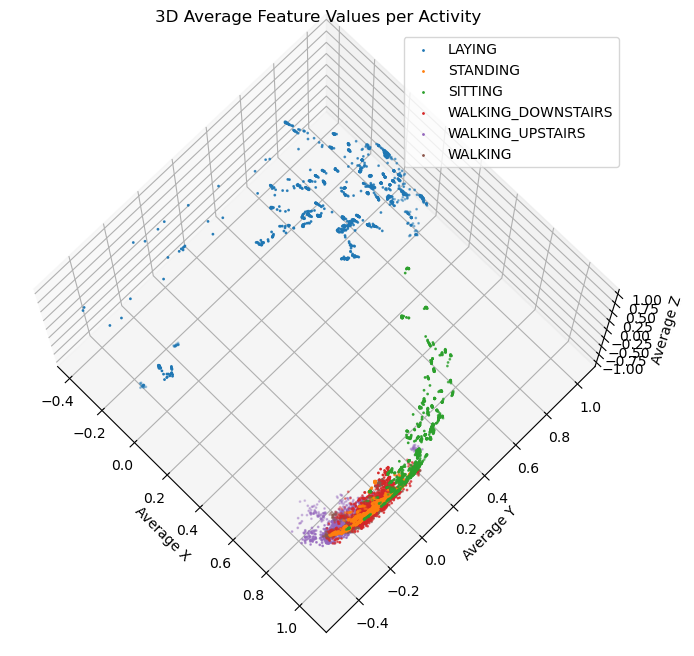

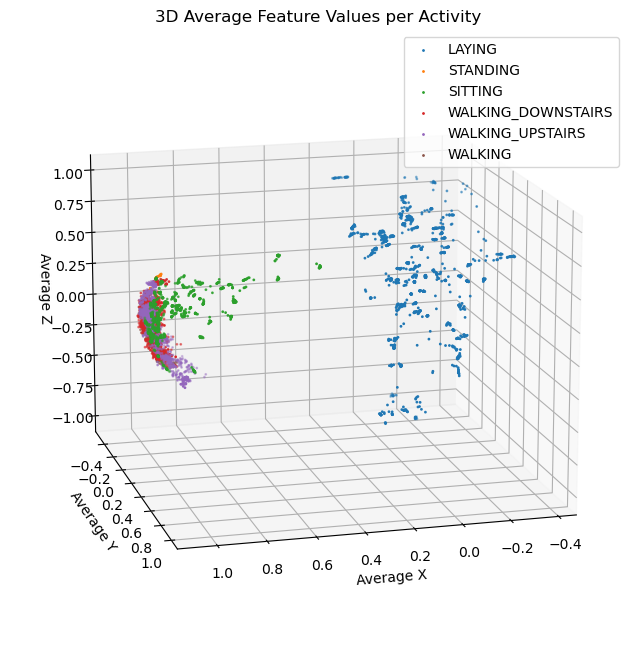

In [219]:
fig = plt.figure(figsize=(10, 8))

_3dplot = fig.add_subplot(111, projection='3d')

for activity_name, value in reversed(feature_averages_by_row.items()):
    _3dplot.scatter([value['x']], [value['y']], [value['z']], label=activity_name, s=1)

_3dplot.set_xlabel('Average X')

_3dplot.set_ylabel('Average Y')

_3dplot.set_zlabel('Average Z')

plt.title("3D Average Feature Values per Activity")

plt.legend()

_3dplot.view_init(elev=0, azim=-15)

plt.show()

fig = plt.figure(figsize=(10, 8))

_3dplot = fig.add_subplot(111, projection='3d') # Create a 3D axis

for activity_name, value in reversed(feature_averages_by_row.items()):
    _3dplot.scatter([value['x']], [value['y']], [value['z']], label=activity_name, s=1)

_3dplot.set_xlabel('Average X')

_3dplot.set_ylabel('Average Y')

_3dplot.set_zlabel('Average Z')

plt.title("3D Average Feature Values per Activity")

plt.legend()

_3dplot.view_init(elev=75, azim=-45) 

plt.show()

fig = plt.figure(figsize=(10, 8))

_3dplot = fig.add_subplot(111, projection='3d') # Create a 3D axis

for activity_name, value in reversed(feature_averages_by_row.items()):
    _3dplot.scatter([value['x']], [value['y']], [value['z']], label=activity_name, s=1)

_3dplot.set_xlabel('Average X')

_3dplot.set_ylabel('Average Y')

_3dplot.set_zlabel('Average Z')

plt.title("3D Average Feature Values per Activity")

plt.legend()

_3dplot.view_init(elev=15, azim=75) 

plt.show()

In [72]:
acc_x = feature_averages_by_row['WALKING']['x']

acc_y = feature_averages_by_row['WALKING']['y']

acc_z = feature_averages_by_row['WALKING']['z']

In [121]:
activity_averages_df = []

column_names = ['sequence_id','x','y','z','activity_name']

for activity_name in activity_names_df['activity_name']:
    activity_df = feature_averages_by_row[activity_name]

    acc_x = activity_df['x']
    acc_y = activity_df['y']
    acc_z = activity_df['z']
    
    for i, row in acc_x.items():
        activity_averages_df.append([i, acc_x.loc[i], acc_y.loc[i], acc_z.loc[i], activity_name])
            
activity_averages_df = pd.DataFrame(activity_averages_df, columns=column_names)

In [122]:
# Flatten the 2D column data into a 1D array
sequence_id_1d = activity_averages_df['sequence_id'].values.ravel()

# Set this 1D array as the new index
activity_averages_df = activity_samples.set_index(sequence_id_1d)

print(activity_averages_df.head())


   sequence_id         x         y         z activity_name
78          78  1.005156 -0.238359 -0.045917       WALKING
79          79  0.996798 -0.258530 -0.033505       WALKING
80          80  1.000311 -0.234899 -0.035729       WALKING
81          81  1.022850 -0.240043 -0.050717       WALKING
82          82  1.005254 -0.245277 -0.044790       WALKING


<h4>Data Standardization</h4>

In [126]:
X = activity_averages_df.iloc[:,1:4]

y = activity_averages_df.iloc[:,-1]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print(f"Dataset shape: {X.shape}")

print(f"Number of features: {X.shape[1]}")

print(f"Number of samples: {X.shape[0]}")

print(f"True number of activity types: {len(np.unique(y))}")

Dataset shape: (7352, 3)
Number of features: 3
Number of samples: 7352
True number of activity types: 6


Standardization is required due to the fact that k-means clustering is sensitive to the scale of features.

<h2>Section 2: Labeled Baseline Review</h2>

The original target variable for the CCPP dataset was the expected power output (PE). The dataset for this assignment was changed to the UCI HAR dataset, with the target variable being [activities] performed while wearing a smartphone.<br><br>
There is a large amount of data in the UCI HAR dataset; however, for the purposes of this assignment, acceleration in the x,y,z directions was selected.<br><br>
The gradient boosting model returned a mean-squared error of 15.076458354814003, which is relatively low. It's not so relevant to the UCI HAR dataset. Error analysis of the previous assignments' supervised models show that the random forests, decision trees, and gradient boosting as models perform adequately at predicting the value of the target variable (PE).<br><br>
The business reality is that being able to predict PE based on temperature and other variables might be effective in producing cost savings. PE was binned for the classification models, and left continuous for the regressor models. Where this falls short is in classification problems. The UCI HAR dataset is selected to display the ability to apply clustering algorithms to at least a similar or marginally related dataset.




In [144]:
activities = activity_names_df['activity_name']

In [160]:
mapping_dict = {}

for i, row in activity_names_df.iterrows():
    mapping_dict[row.activity_name] = i
    
mapping_dict

{'WALKING': 0,
 'WALKING_UPSTAIRS': 1,
 'WALKING_DOWNSTAIRS': 2,
 'SITTING': 3,
 'STANDING': 4,
 'LAYING': 5}

In [161]:
y

78      WALKING
79      WALKING
80      WALKING
81      WALKING
82      WALKING
         ...   
7257     LAYING
7258     LAYING
7259     LAYING
7260     LAYING
7261     LAYING
Name: (activity_name,), Length: 7352, dtype: object

In [162]:
y_class = y.map(mapping_dict)

y_class

78      0
79      0
80      0
81      0
82      0
       ..
7257    5
7258    5
7259    5
7260    5
7261    5
Name: (activity_name,), Length: 7352, dtype: int64

<h2>Section 3: Optimal K Selection</h2>

<h3>3.1 Elbow Method</h3>

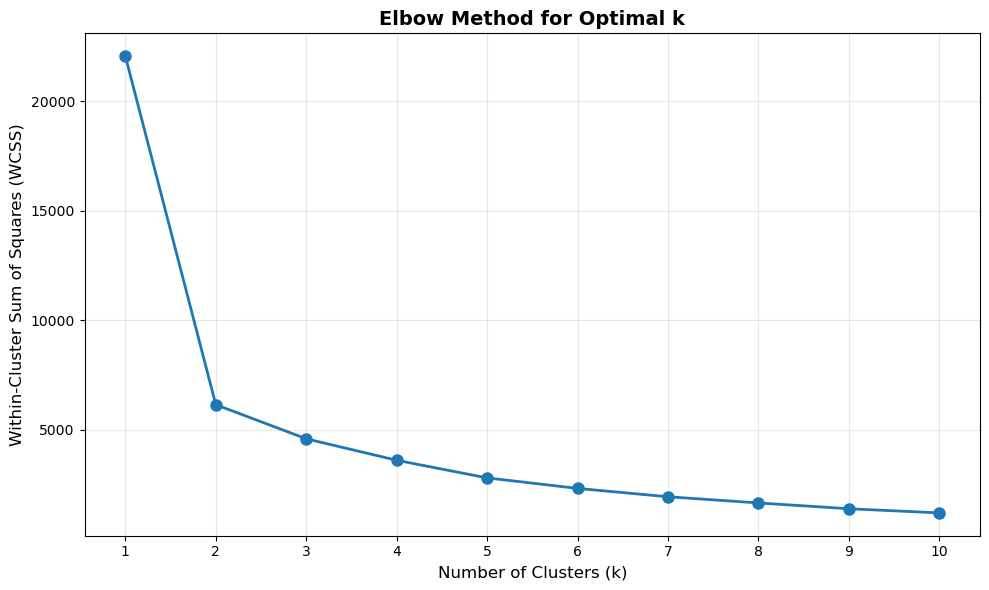

In [260]:
k_range = range(1, 11)

wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    kmeans.fit(X_scaled)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))

plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)

plt.xlabel('Number of Clusters (k)', fontsize=12)

plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)

plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

plt.xticks(k_range)

plt.tight_layout()

plt.show()

The elbow method is a visual technique of selecting the optimal number of clusters, k. The elbow represents the point of diminishing returns. Before the elbow, adding clusters significantly improves the grouping. The elbow point for the UCI HAR IMU dataset is k=2 with the above k-means clustering. This matches what we know about the dataset.<br><br>
From a quick look, the 6 body positions do have two clusters. The IMU used is installed on the smartphone, which is attached to the hip of the subjects. There are two distinct body positions, where the IMU would be oriented vertical, and where the IMU would be oriented horizontal. There are some differences that are seen in the vertical orientations, as can be seen in Figure . These activities could probably be clustered with a more complex model; however, for the scope of this assignment, finding the elbow point at k=2 seems to match what the dataset and common knowledge displays.

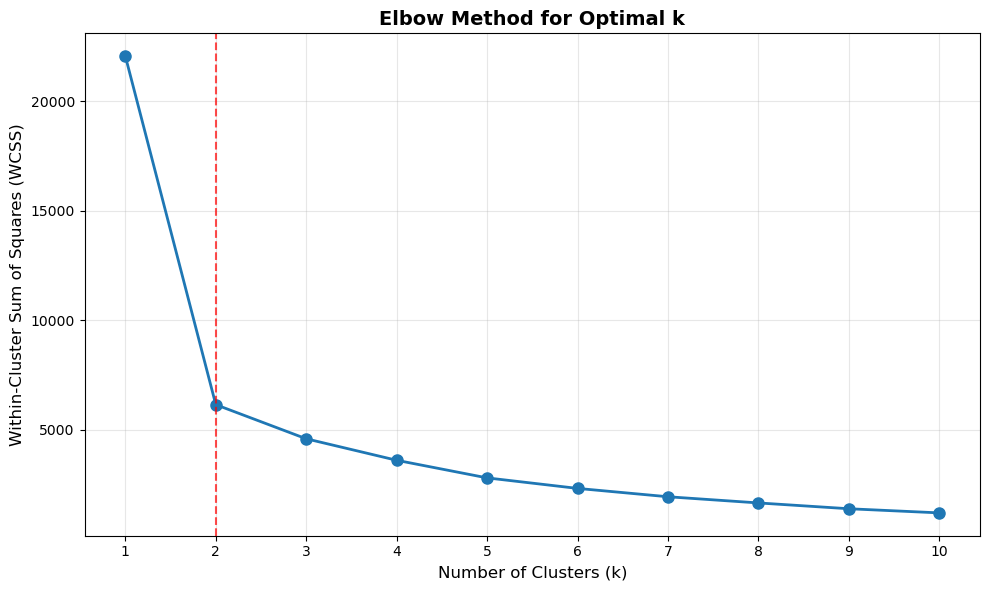

In [263]:
k_range = range(1, 11)

wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    kmeans.fit(X_scaled)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))

plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)

plt.xlabel('Number of Clusters (k)', fontsize=12)

plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)

plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

plt.xticks(k_range)

plt.axvline(x=2, color='red', linestyle='--', alpha=0.7, label='Potential Elbow (k=3)')

plt.tight_layout()

plt.show()

<h3>3.2 Silhouette Score Analysis</h3>

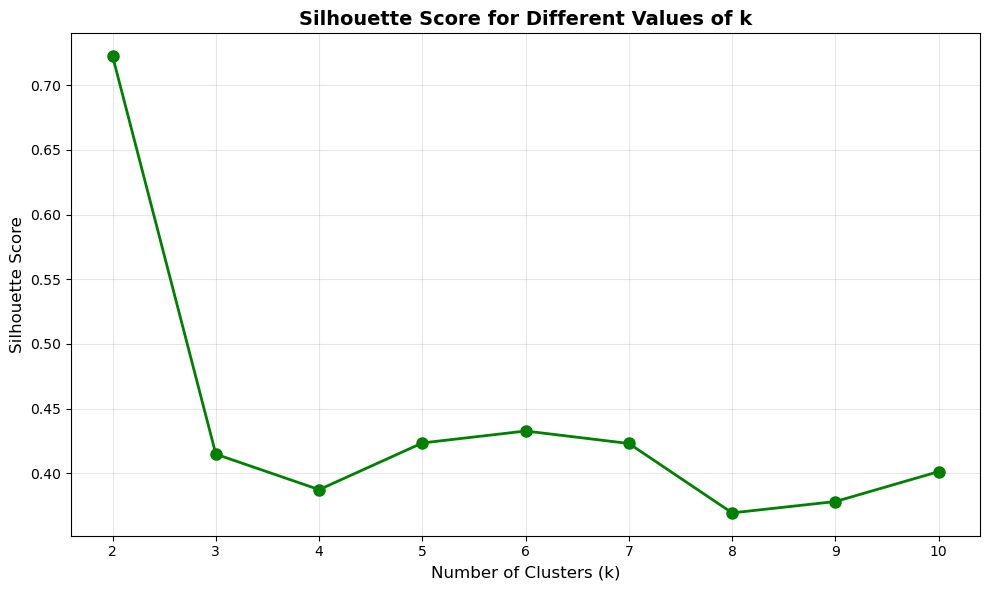

In [272]:
silhouette_scores = []

k_range_silhouette = range(2, 11)

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    score = silhouette_score(X_scaled, cluster_labels)
    
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))

plt.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')

plt.xlabel('Number of Clusters (k)', fontsize=12)

plt.ylabel('Silhouette Score', fontsize=12)

plt.title('Silhouette Score for Different Values of k', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

plt.xticks(k_range_silhouette)

best_k = k_range_silhouette[np.argmax(silhouette_scores)]

best_score = max(silhouette_scores)

plt.tight_layout()

plt.show()

Silhouette score for k=2 matches the elbow method in determining 2 clusters. There are 6 activities, and there's a local maximum at k=6. The effectiveness of k-means clustering is limited by the assumption of spherical clusters. Figure  shows that the actual clusters have significant overlap in the 3D space. A neural network that can generalize on higher dimensional topologies could be appropriate.

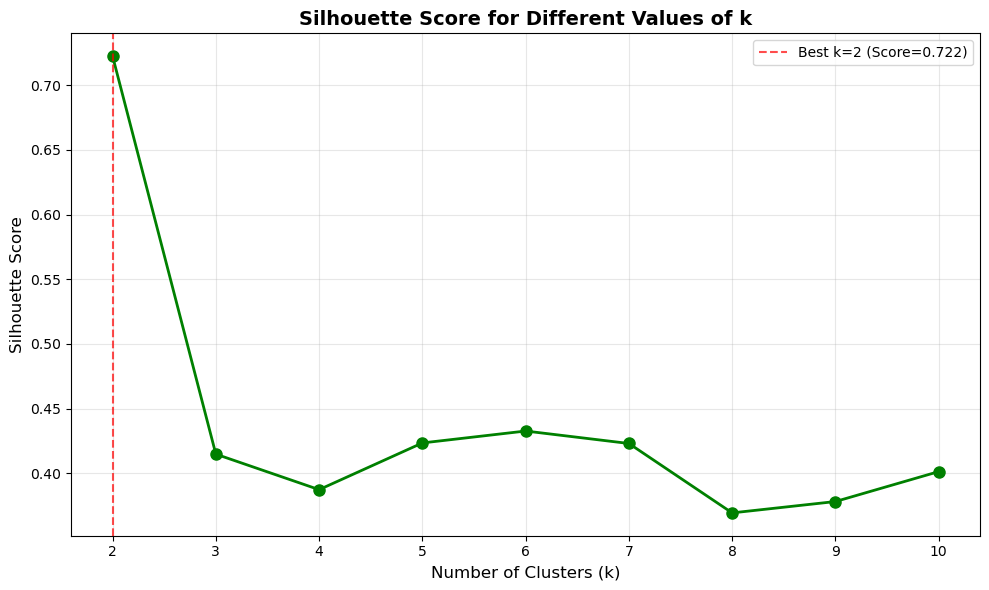

Optimal number of clusters based on Silhouette Score: k=2
Best Silhouette Score: 0.722


In [273]:
silhouette_scores = []

k_range_silhouette = range(2, 11)

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    score = silhouette_score(X_scaled, cluster_labels)
    
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))

plt.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')

plt.xlabel('Number of Clusters (k)', fontsize=12)

plt.ylabel('Silhouette Score', fontsize=12)

plt.title('Silhouette Score for Different Values of k', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

plt.xticks(k_range_silhouette)

best_k = k_range_silhouette[np.argmax(silhouette_scores)]

best_score = max(silhouette_scores)

plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, 
           label=f'Best k={best_k} (Score={best_score:.3f})')

plt.tight_layout()

plt.show()

The silhouette score is a quantitative measure of the quality of clusters. Perfect clustering returns a score of +1, representing that points are close to their cluster and far from others. A score of 0 representsd overlapping clusters, and a score of -1 represents that points might be assigned to the wrong cluster.<br><br>
The silhouette score at k=2 indicates that 2 clusters is the optimal number of clusters.

<h3>3.3 K Selection Decision</h3>

Both methods return k=2, so the comparison is relatively straightforward. I selected k=2 due to the reason that both elbow method and silhouette score returned k=2. A visual glance also corroborates that there are two distinct clusters. There are 6 different activities; however, the activities that happen when vertical are all similar to the extent that a more complex clustering approach could be used.

<h2>Section 4: K-Means Clustering</h2>

<h3>4.1 Build Final Model</h3>


k=2


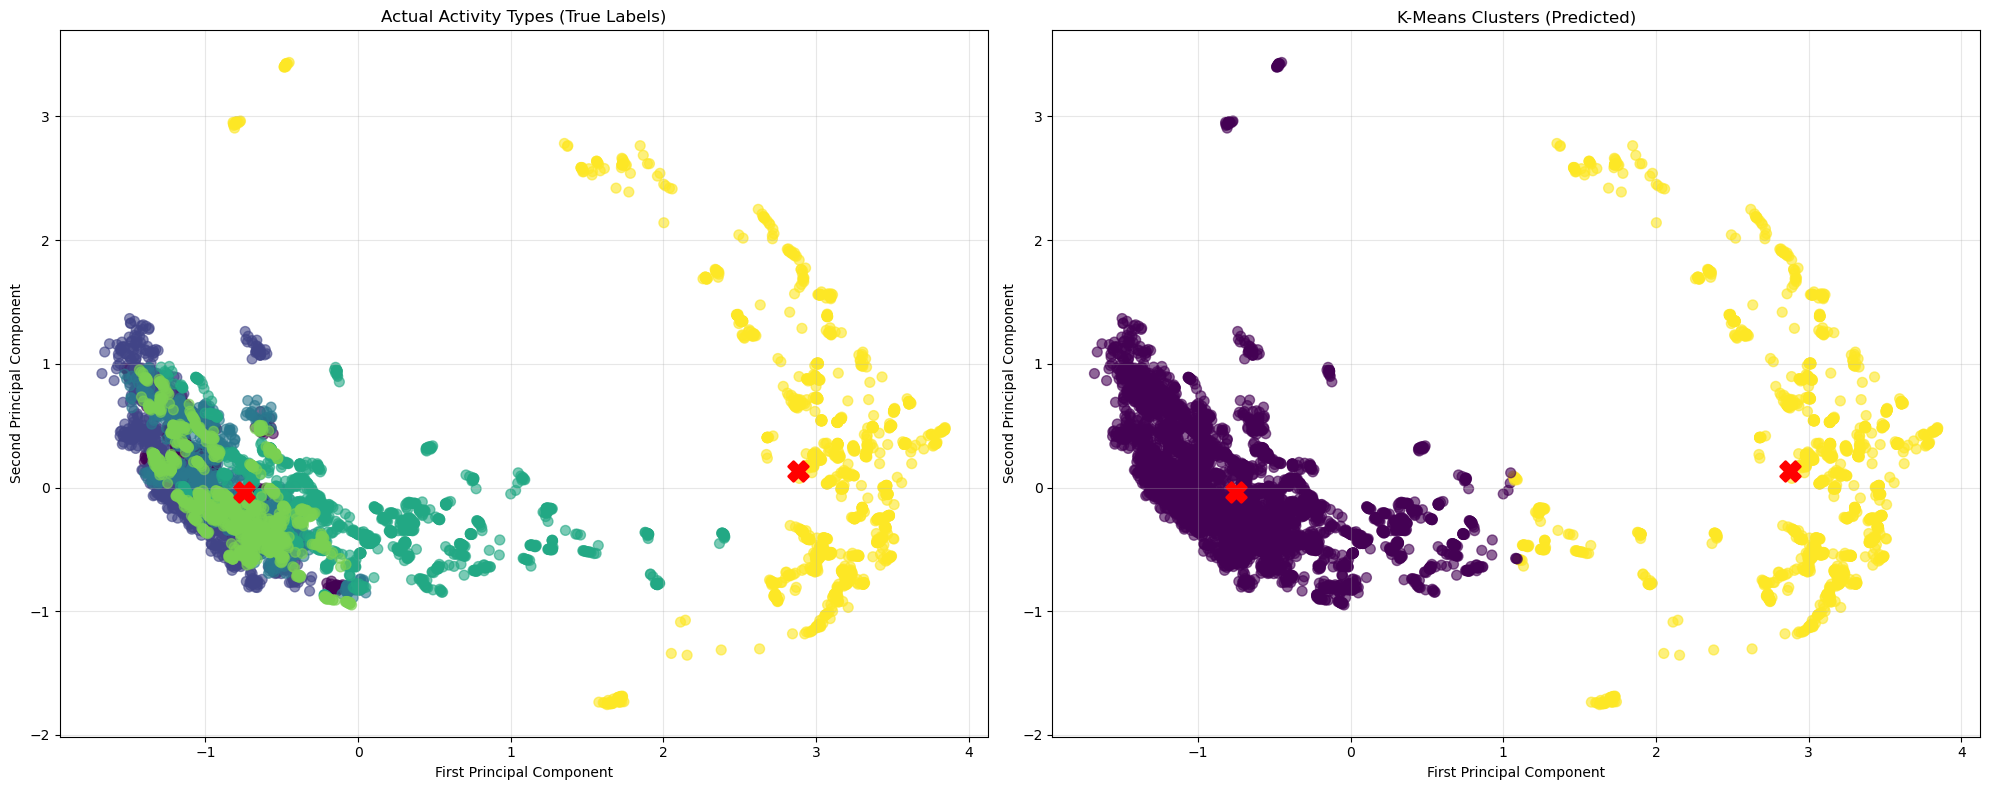

In [270]:
k=2

print(f"\nk={k}")

pca = PCA(n_components=2, random_state=42)
    
X_2d = pca.fit_transform(X_scaled)

kmeans_2d = KMeans(n_clusters=k, random_state=42, n_init=10)
    
labels_2d = kmeans_2d.fit_predict(X_2d)

plt.figure(figsize=(20, 8))

plt.subplot(121)
    
scatter1 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_class, cmap='viridis', alpha=0.6, s=50)
    
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
               s=200, c='red', marker='X', label='Centroids', linewidths=2)
    
plt.xlabel('First Principal Component')
    
plt.ylabel('Second Principal Component')
    
plt.title('Actual Activity Types (True Labels)')
    
plt.grid(True, alpha=0.3)

plt.subplot(122)
    
scatter2 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_2d, cmap='viridis', alpha=0.6, s=50)
    
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
               s=200, c='red', marker='X', label='Centroids', linewidths=2)
    
plt.xlabel('First Principal Component')
    
plt.ylabel('Second Principal Component')
    
plt.title('K-Means Clusters (Predicted)')
        
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()


k=2


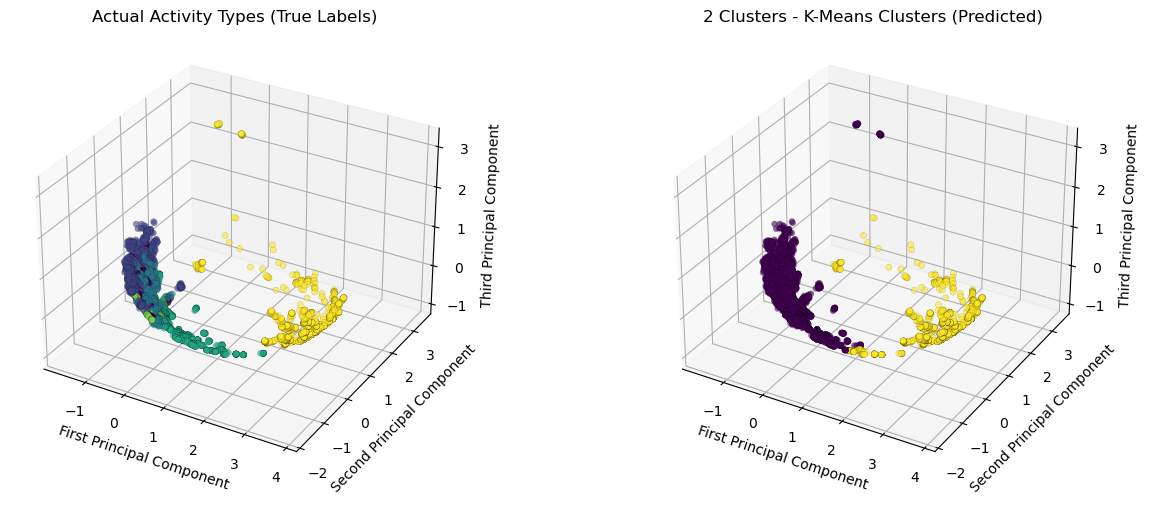

In [353]:
k=2

print(f"\nk={k}")

pca_3d = PCA(n_components=3, random_state=42)

X_3d = pca_3d.fit_transform(X_scaled)

kmeans_3d_true = KMeans(n_clusters=len(set(y_class)), random_state=42, n_init=10)

kmeans_3d_pred = KMeans(n_clusters=k, random_state=42, n_init=10)
    
labels_k = kmeans_3d_pred.fit_predict(X_3d)

fig = plt.figure(figsize=(14, 5))
    
_trueplot = fig.add_subplot(121, projection='3d')
 
_clusterplot = fig.add_subplot(122, projection='3d')

scatter1 = _trueplot.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                                 c=y_class, 
                                 cmap='viridis', 
                                 alpha=0.6, 
                                 s=20, 
                                 edgecolor='black', 
                                 linewidths=0.1)

_trueplot.set_xlabel('First Principal Component')

_trueplot.set_ylabel('Second Principal Component')

_trueplot.set_zlabel('Third Principal Component')

_trueplot.set_title(f'Actual Activity Types (True Labels)')

_trueplot.grid(True, alpha=0.3)

scatter2 = _clusterplot.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                                    c=labels_k, 
                                    cmap='viridis', 
                                    alpha=0.6, 
                                    s=20, 
                                    edgecolor='black', 
                                    linewidths=0.1,
                                    zorder=10)
    
_clusterplot.set_xlabel('First Principal Component')

_clusterplot.set_ylabel('Second Principal Component')

_clusterplot.set_zlabel('Third Principal Component')
    
_clusterplot.set_title(f'{k} Clusters - K-Means Clusters (Predicted)')

_clusterplot.grid(True, alpha=0.3)

plt.tight_layout() 

plt.show()


In [317]:
X_final = pd.DataFrame(X_3d, columns=['x','y','z'])

X_final['activity'] = labels_k

X_final

x         y         z  activity
0    -0.958990 -0.172075  0.118946         0
1    -0.957468 -0.215032  0.172976         0
2    -0.929305 -0.188116  0.121566         0
3    -0.997905 -0.180704  0.087904         0
4    -0.968283 -0.182294  0.131801         0
...        ...       ...       ...       ...
7347  3.335641  0.294173  0.051462         1
7348  3.330583  0.282454  0.049325         1
7349  3.326950  0.282568  0.047200         1
7350  3.325200  0.284438  0.045188         1
7351  3.326635  0.282426  0.046432         1

[7352 rows x 4 columns]

In [319]:
mapping_dict_clustered = {0:'HORIZONTAL',
                          1:'VERTICAL'}

X_final['activity_names'] = X_final['activity'].map(mapping_dict_clustered)

X_final

x         y         z  activity activity_names
0    -0.958990 -0.172075  0.118946         0     HORIZONTAL
1    -0.957468 -0.215032  0.172976         0     HORIZONTAL
2    -0.929305 -0.188116  0.121566         0     HORIZONTAL
3    -0.997905 -0.180704  0.087904         0     HORIZONTAL
4    -0.968283 -0.182294  0.131801         0     HORIZONTAL
...        ...       ...       ...       ...            ...
7347  3.335641  0.294173  0.051462         1       VERTICAL
7348  3.330583  0.282454  0.049325         1       VERTICAL
7349  3.326950  0.282568  0.047200         1       VERTICAL
7350  3.325200  0.284438  0.045188         1       VERTICAL
7351  3.326635  0.282426  0.046432         1       VERTICAL

[7352 rows x 5 columns]

<h3>4.2 Cluster Characterization</h3>

In [320]:
X_final.groupby('activity_names').count()['activity']

activity_names
HORIZONTAL    5858
VERTICAL      1494
Name: activity, dtype: int64

In [323]:
X_final.groupby('activity_names').describe()[['x','y','z']].T

activity_names   HORIZONTAL     VERTICAL
x count         5858.000000  1494.000000
  mean            -0.741309     2.906684
  std              0.487319     0.601089
  min             -1.677469     1.144089
  25%             -1.071642     2.750119
  50%             -0.805655     3.045028
  75%             -0.534013     3.289829
  max              1.137346     3.846135
y count         5858.000000  1494.000000
  mean            -0.036599     0.143505
  std              0.501911     0.926787
  min             -0.949357    -1.754830
  25%             -0.355614    -0.526326
  50%             -0.156624     0.005875
  75%              0.197682     0.619533
  max              3.435685     2.780986
z count         5858.000000  1494.000000
  mean            -0.027790     0.108966
  std              0.382987     0.637147
  min             -0.963518    -0.875459
  25%             -0.224129    -0.308326
  50%             -0.006163     0.028681
  75%              0.162851     0.392426
  max              2.698578     3.152728

The most defining characteristic is the x position. [VERTICAL] orientation has greater than 0 acceleration in the x direction, and the opposite is true for [HORIZONTAL].

<h3>4.3 Representative Examples</h3>

HORIZONTAL
             x         y         z
1818 -1.677469  0.921120  0.903280
1822 -1.659123  1.095454  0.818842
1611 -1.628243  1.161697  0.680889

VERTICAL
             x         y         z
6637  3.842133  0.484336  0.886534
6655  3.842173  0.471053  0.886386
6638  3.846135  0.480515  0.897330

k=2


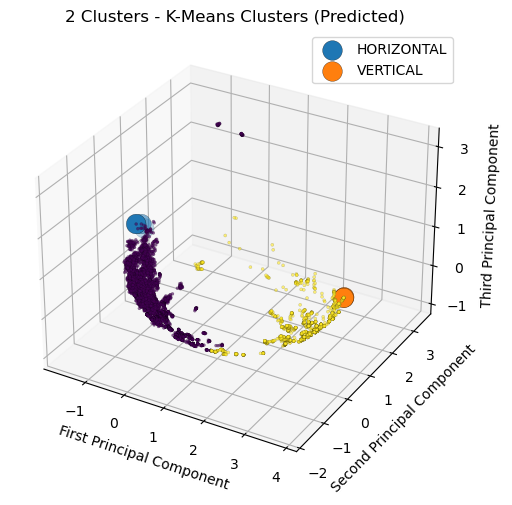

In [349]:
x_top = X_final.sort_values('x').iloc[:3][['x','y','z']]

x_bot = X_final.sort_values('x').iloc[-3:][['x','y','z']]

print(f"HORIZONTAL\n{x_top}\n")

print(f"VERTICAL\n{x_bot}")

k=2

print(f"\nk={k}")

pca_3d = PCA(n_components=3, random_state=42)

X_3d = pca_3d.fit_transform(X_scaled)

kmeans_3d_true = KMeans(n_clusters=len(set(y_class)), random_state=42, n_init=10) # Using true number of classes for "True Labels" plot centroids

kmeans_3d_pred = KMeans(n_clusters=k, random_state=42, n_init=10)
    
labels_k = kmeans_3d_pred.fit_predict(X_3d)

fig = plt.figure(figsize=(14, 5))
     
_clusterplot = fig.add_subplot(111, projection='3d')

scatter2 = _clusterplot.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                                    c=labels_k, 
                                    cmap='viridis', 
                                    alpha=0.6, 
                                    s=5, 
                                    edgecolor='black', 
                                    linewidths=0.1,
                                    zorder=0)
    
_clusterplot.set_xlabel('First Principal Component')

_clusterplot.set_ylabel('Second Principal Component')

_clusterplot.set_zlabel('Third Principal Component')
    
_clusterplot.set_title(f'{k} Clusters - K-Means Clusters (Predicted)')

_clusterplot.grid(True, alpha=0.3)

_clusterplot.scatter(x_top['x'],x_top['y'],x_top['z'],
                s=200,
               edgecolor='black',
               linewidths=0.2,
                    zorder=10,
                    label='HORIZONTAL')

_clusterplot.scatter(x_bot['x'],x_bot['y'],x_bot['z'],
                s=200,
               edgecolor='black',
               linewidths=0.2,
                    zorder=10,
                    label='VERTICAL')

plt.legend()

plt.tight_layout() 

plt.show()


The smartphone is worn on the waist and the orientation of the IMU corresponds to movement in the x direction corresponding to whether or not the body is [VERTICAL] or [HORIZONTAL].

<h2>Section 5: PCA Visualization</h2>

<h3>5.1 Apply PCA</h3>

In [ ]:
There are only 3 principal components, 


6 clusters


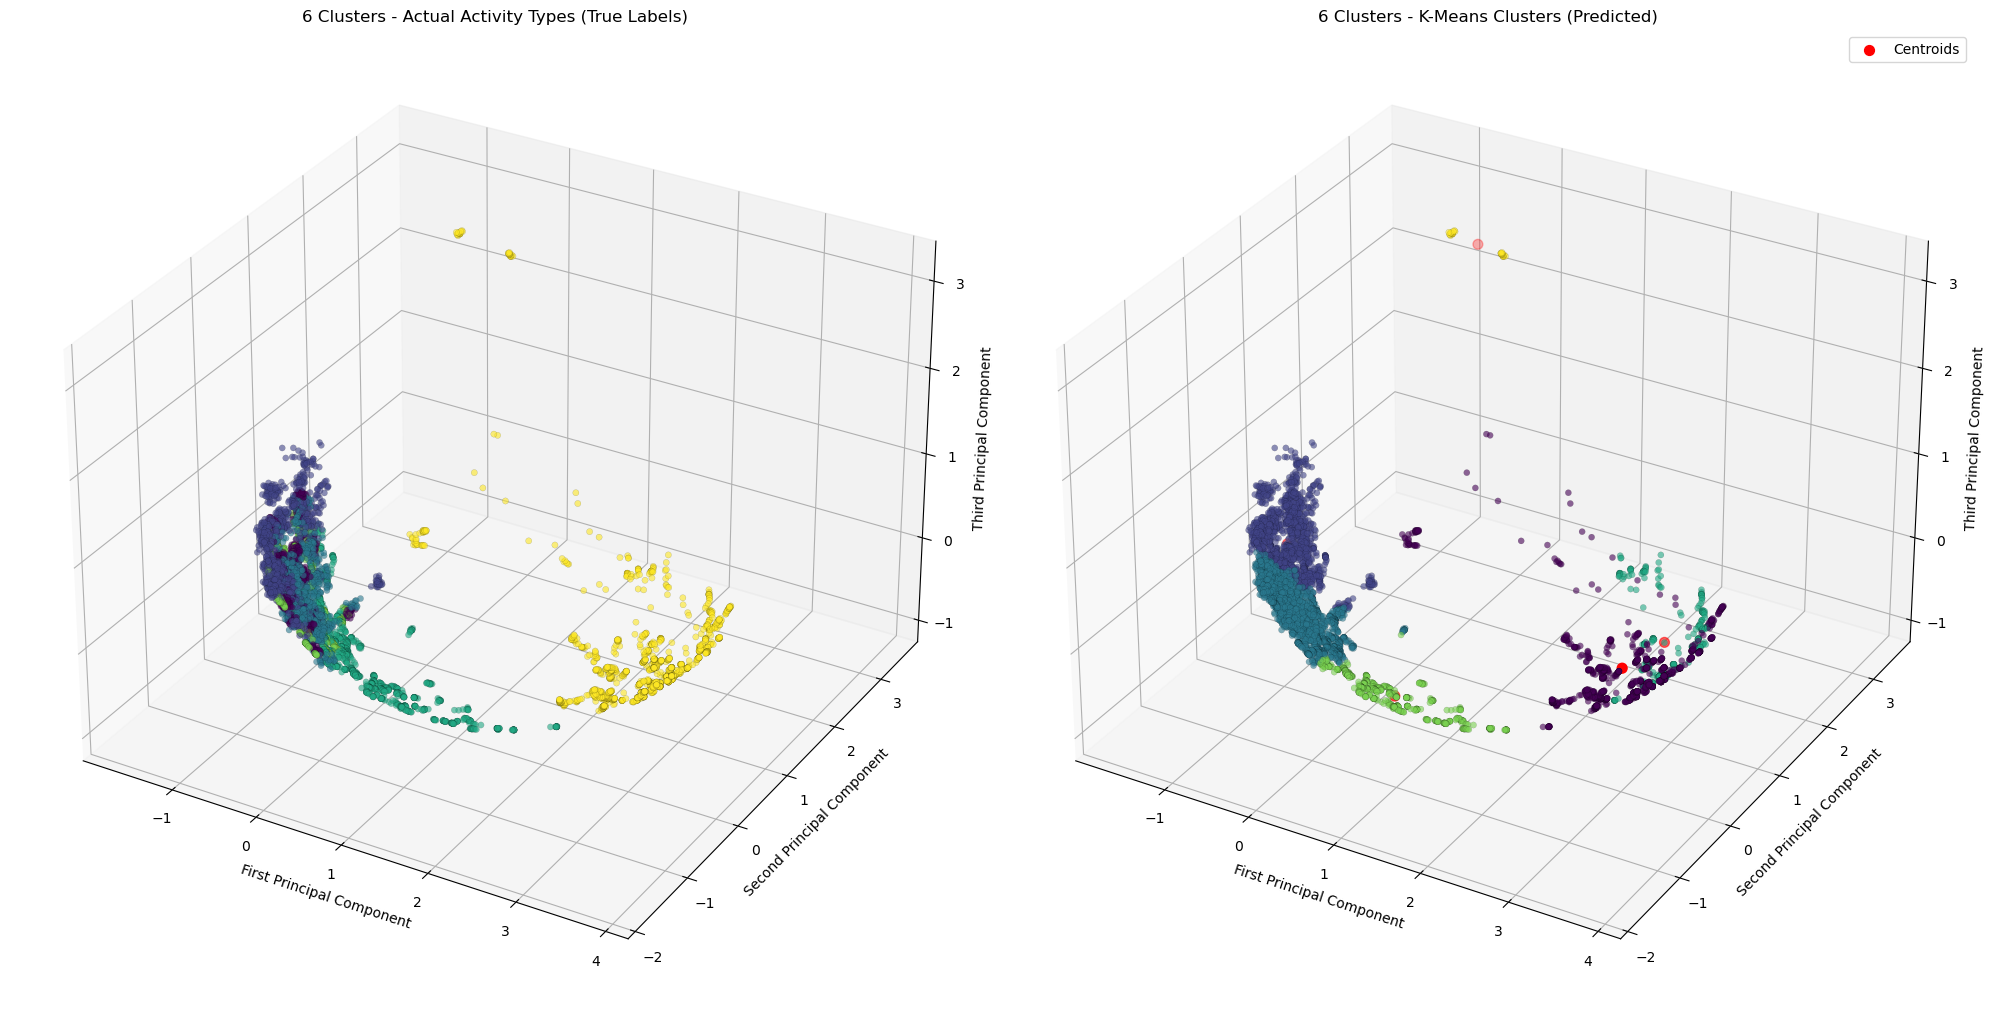

In [223]:
k=6

print(f"\n{k} clusters")

pca_3d = PCA(n_components=3, random_state=42)

X_3d = pca_3d.fit_transform(X_scaled)

kmeans_3d_true = KMeans(n_clusters=len(set(y_class)), random_state=42, n_init=10) # Using true number of classes for "True Labels" plot centroids

kmeans_3d_pred = KMeans(n_clusters=k, random_state=42, n_init=10)
    
labels_k = kmeans_3d_pred.fit_predict(X_3d)

fig = plt.figure(figsize=(20, 10))
    
_trueplot = fig.add_subplot(121, projection='3d')

_clusterplot = fig.add_subplot(122, projection='3d')

scatter1 = _trueplot.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                                 c=y_class, 
                                 cmap='viridis', 
                                 alpha=0.6, 
                                 s=20, 
                                 edgecolor='black', 
                                 linewidths=0.1)
    
_trueplot.set_xlabel('First Principal Component')

_trueplot.set_ylabel('Second Principal Component')

_trueplot.set_zlabel('Third Principal Component')

_trueplot.set_title(f'{k} Clusters - Actual Activity Types (True Labels)')

_trueplot.grid(True, alpha=0.3)

scatter2 = _clusterplot.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                                    c=labels_k, 
                                    cmap='viridis', 
                                    alpha=0.6, 
                                    s=20, 
                                    edgecolor='black', 
                                    linewidths=0.1,
                                    zorder=10)
    
_clusterplot.scatter(kmeans_3d_pred.cluster_centers_[:, 0], kmeans_3d_pred.cluster_centers_[:, 1], 
                     kmeans_3d_pred.cluster_centers_[:, 2], s=50, c='red', marker='o', label='Centroids', zorder=0)

_clusterplot.set_xlabel('First Principal Component')

_clusterplot.set_ylabel('Second Principal Component')

_clusterplot.set_zlabel('Third Principal Component')

_clusterplot.set_title(f'{k} Clusters - K-Means Clusters (Predicted)')

_clusterplot.legend()

_clusterplot.grid(True, alpha=0.3)

plt.tight_layout() 

plt.show()


In [351]:
y_class

78      0
79      0
80      0
81      0
82      0
       ..
7257    5
7258    5
7259    5
7260    5
7261    5
Name: (activity_name,), Length: 7352, dtype: int64

Crosstabulation Table:
Cluster_ID     0     1
True_Label            
0           1226     0
1           1073     0
2            986     0
3           1162   124
4           1374     0
5             37  1370


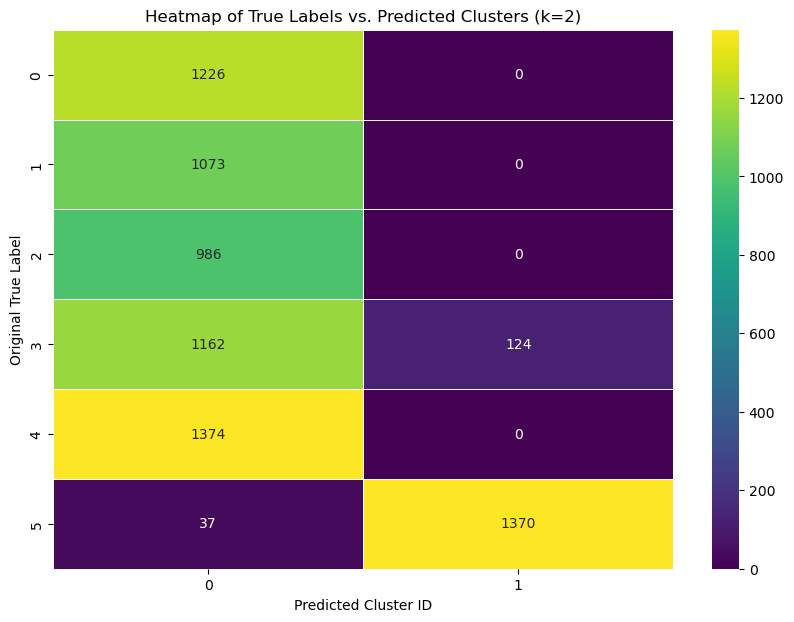

In [304]:
results_df = pd.DataFrame({
    'True_Label': y_class,
    'Cluster_ID': labels_k  # Use your 3D or 2D predicted labels here
})

# 2. Generate the Crosstab (Contingency Table)
# This table shows how many instances of each 'True_Label' fall into each 'Cluster_ID'
crosstab_data = pd.crosstab(results_df['True_Label'], results_df['Cluster_ID'])

print("Crosstabulation Table:")
print(crosstab_data)

# 3. Visualize the Crosstab as a Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='viridis', linewidths=.5)

plt.title(f'Heatmap of True Labels vs. Predicted Clusters (k={k})')
plt.xlabel('Predicted Cluster ID')
plt.ylabel('Original True Label')
plt.show()


In [302]:
for k in range(2, 3):
    labels_3d = kmeans_3d.fit_predict(X_3d)

    ari_score = adjusted_rand_score(y_class, labels_3d)
    
    nmi_score = normalized_mutual_info_score(y_class, labels_3d)
    
    print(f"\n{k} clusters")
    
    print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
    
    print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
    



2 clusters
Adjusted Rand Index (ARI): 0.1853
Normalized Mutual Information (NMI): 0.3920


<h2>Section 7: Segment Personas and Action Plans</h2>

<h3>7.1 Persona</h3>

There were two clusters in the model built. In the labeled dataset, there were actually 6 activities, and so, 6 clusters could have made sense. However; given the overarching similarity of the activities in the vertically oriented cluster, 2 clusters make sense for the assignment.<br><br>
Some clever names for the clusters could be: vertical and horizontal; or vertically-oriented and horizontally-oriented. A typical member of the vertically-oriented segment is an activity in which acceleration follows the profile:<br>

x > 0<br>
y < 0<br>
z ~ 0<br>

The typical member of the horizontally-oriented segment is an activity in which acceleration follows the profile:<br>

x < 0<br>
y > 0<br>
z > 0<br>

In simple terms, where the body is either vertical or horizontal.<br><br>

The main characteristic of the clusters developed are whether or not the body is oriented vertically or horizontally. The smartphone attached at the waist has an IMU that indicates what position the body is in. The characteristic that makes each activity distinct, other than the directions of acceleration, are the visual appearance of either being vetically-oriented or horizontally-oriented.<br><br>
Additional clusters could have been determined, and, with addtional time, further analyses might be performed.

<h3>7.2 Action Plan</h3>

The most relevant action plan for the industry of wearing smartphones on waists, or, the actual industry of power generation and distribution would be to build automated parts and pieces of power plants. The most specific example I can think about might be a valve, maybe a solenoid valve. The amount of power driven to said solenoid valve could be controlled by a control system, and in the calibration of said control system, clustering analyses could be used to determine proper setpoints. An additional example could be a plant-wide control system where it's not just one valve, it's many valves influencing a large control scheme.<br><br>
For the UCI HAR dataset specifically, additional research could be conducted to correlate viewing habits or other activities with body position during the activities studied to produce the dataset. Each activity could be clustered based on whether or not said activity is sedentary or active. With this in mind, a type of body-wellness app or research could be conducted to utilize more fully the clustering developed in this assignment.<br><br>
A corresponding heartrate monitor could be paired with the smartphone worn on the waist. Said app could be connected to a socialized workout app or something similar. In contrast, the sedentary, specifically, the laying activities could be paired with sleep apps. Wearable technologies could be built to take advantage of the IMU used on the waist-mounted smartphones. Specific to the clustering analyses performed in this assignment, IMU performance could be improved. A wrapper app could be developed to take advantage of clustering different body positions into discrete units.<br><br>






<h2>Section 8: Reflection</h2>

The most surprising observation about the clusters was that k=2 was the optimal number of clusters. Given the physical reality of the dataset, that there were two main positions, vertical and horizontal, the results of the assignment make sense.<br><br>
The clusters align well with my understanding of the wearing smartphones on waists industry. The visual clusters match the predicted clusters. In terms of the power generation and power distribution industry, advanced controls for equipment like valves and VFDs could potentially produce cost savings, like the predictive models developed in the previous assignments.<br><br>
Some limitations encountered were the similarities in the activities where the body position would be vertical. Rather than spend additional time on developing a different clustering model, the k-means clustering model sufficed. Especially for the purpose of translating said results to the power generation industry. It was difficult to find a true analogue between the datasets; however, the applicability of clustering to maybe automated valves and VFD suffices.<br><br>
